<a href="https://colab.research.google.com/github/pereira94/NYPD-Stop-Question-Frisk-Analysis/blob/main/NYPD_Stop_Question_Frisk/NYPD_Search_Frisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Overview 

The NYPD Stop, Question, and Frisk program allows officers to stop civilians, and if appropriate, search them for weapons and contraband. The program is meant to be a deterrent for crime. However, it has been the subject of constitutional rights violation accusations. The program has been consistently perceived as discriminatory in nature towards minorities, specially the black and hispanic community. 

In 2008, a lawsuit was filed against the city of New York for constitutional rights violations. The initial motion cited an overreliance on racial descriptions. After years of litigation, the trial began on March 18, 2013 and culminated with a ruling that favored the plaintiff. The verdict cited constitutional violations, and subsequently ordered the NYPD to implement appropriate reforms. 

**Objectives**

The main question that this analysis aims at answering is whether there was any change from 2012 - the last full year of the program prior to the court decision - and 2019 - the most recent year for which data is available. The metrics below will be used to conduct the comparative assessment.

- Breakdown by boroughs and race 
- Age distribution overall, by race, and by sex
- Percentage of stops that led to the individual being frisked, by race
- Percentage of stops that led to the individual being searched, by race 
- Percentage of stops that led to the use of physical force, by race
- Percentage of stops that led to the seizure of contraband, by race
- Percentage of stops that led to the seizure of a firearm, by race
- Is there a relationship between the number of stops by the program and the crime rate?


# Library Imports 

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Stop, Question and Frisk Over Time

Text(2014-01-01 00:00:00, 400000, '2013 Court ruled agaisnt city')

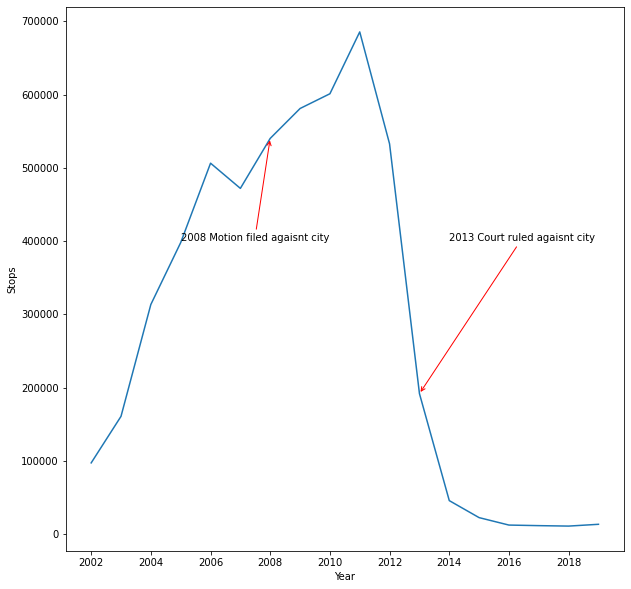

In [ ]:
#Reading in data containing the number of sqf stops and crimes by year
crime_stops = pd.read_csv('/content/drive/My Drive/Data Sets/NYPD Crime and Stops by Year.csv')
#Converting to datetime format
crime_stops['Year'] = pd.to_datetime(crime_stops['Year'], format='%Y')
#Plotting the time series 
plt.figure(figsize=(10,10))
sns.lineplot(x='Year', y='Stops', data=crime_stops)
#Annotating points of importance
plt.annotate("2008 Motion filed agaisnt city", xy=(pd.Timestamp('2008-01-01'), 540302), xytext=(pd.Timestamp('2005-01-01'), 400000), arrowprops={'arrowstyle':'->', 'color':'red'})
plt.annotate("2013 Court ruled agaisnt city", xy=(pd.Timestamp('20130101'), 191851), xytext=(pd.Timestamp('2014-01-01'), 400000), arrowprops={'arrowstyle':'->', 'color':'red'})

At the height of the program, over 600,000 stops were conducted. Begining in 2012, there was a steady decline in number of stops with only 13,459 stops conducted in 2019.

#Data Import & Cleaning

In [ ]:
#Reading in 2012 data
sqf2012 = pd.read_csv('/content/drive/My Drive/Data Sets/2012.csv')
#Keepinh the relevant columns fromt the dataset
relevant_col = ['datestop', 'arstmade', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'machgun'
, 'pf_hands',	'pf_wall',	'pf_grnd',	'pf_drwep', 'pf_ptwep',	'pf_baton' ,	'pf_hcuff',	'pf_pepsp', 'sex',	'race' ,'age', 'city', 'xcoord', 'ycoord']
sqf2012 = sqf2012[relevant_col]
#Combing all weapons columns into one
sqf2012.loc[sqf2012['riflshot'] == 'Y', 'fireweap'] = 'Y'
sqf2012.loc[sqf2012['pistol'] == 'Y', 'fireweap'] = 'Y'
sqf2012.loc[sqf2012['asltweap'] == 'Y', 'fireweap'] = 'Y'
sqf2012.loc[sqf2012['machgun'] == 'Y', 'fireweap'] = 'Y'
#Combining all use of force columns into one
sqf2012.loc[sqf2012['pf_hands'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_wall'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_grnd'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_drwep'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_ptwep'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_baton'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_hcuff'] == 'Y', 'pfused'] = 'Y'
sqf2012.loc[sqf2012['pf_pepsp'] == 'Y', 'pfused'] = 'Y'
#Dropping columns that were left over after combining
dropcolumns2012 = ['riflshot', 'pistol', 'asltweap', 'machgun', 'pf_hands',	'pf_wall',
                   'pf_grnd',	'pf_drwep',	'pf_ptwep',	'pf_baton',	'pf_hcuff',	'pf_pepsp']
sqf2012 = sqf2012.drop(dropcolumns2012, axis=1)
#Filling na values 
navalues = {'fireweap': 'N', 'pfused':'N'}
sqf2012 = sqf2012.fillna(value=navalues)
#Replacing race codes with race descriptions
race_mappings = {'A':'Other/Unknown', 'B':'Black', 'I': 'Other/Unknown', 
            'P': 'Hispanic', 'Q': 'Hispanic', 
            'W': 'White', 'X':'Other/Unknown', 'Z':'Other/Unknown', 'U':'Other/Unknown'}
sqf2012['race'] = sqf2012['race'].replace(race_mappings)
#Converting format to date
sqf2012['datestop'] = pd.to_datetime(sqf2012['datestop'], format='%m%d%Y')
sqf2012['datestop'] = sqf2012['datestop'].dt.date
#Replacing empty spaces in column with Nan
sqf2012['city'] = sqf2012['city'].replace({' ':np.nan})
#Replacing sex code with description
sqf2012['sex'] = sqf2012['sex'].replace({'Z':'Unknown'})
#Replacing age entry errors with the median age
agemedian = sqf2012['age'].median()
sqf2012.loc[sqf2012['age'] > 90, 'age'] = agemedian
sqf2012.loc[sqf2012['age'] <= 10, 'age'] = agemedian

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,73,103,110,111) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Reading in 2019 data
sqf2019 = pd.read_csv('/content/drive/My Drive/Data Sets/sqf-2019.csv')
#Keeping relevant columns
relevant_col1 = ['STOP_FRISK_DATE', 'SUSPECT_ARRESTED_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG', 'OTHER_CONTRABAND_FLAG', 'FIREARM_FLAG'
                  ,'PHYSICAL_FORCE_CEW_FLAG', 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG', 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG', 'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG'
                  ,'PHYSICAL_FORCE_OTHER_FLAG', 'PHYSICAL_FORCE_RESTRAINT_USED_FLAG', 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG'
                  ,'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'STOP_LOCATION_BORO_NAME', 'STOP_LOCATION_X', 'STOP_LOCATION_Y']
sqf2019 = sqf2019[relevant_col1]
#Combining all use of force columns into one
sqf2019.loc[sqf2019['PHYSICAL_FORCE_CEW_FLAG'] == 'Y', 'pfused'] = 'Y'
sqf2019.loc[sqf2019['PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG'] == 'Y', 'pfused'] = 'Y'
sqf2019.loc[sqf2019['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG'] == 'Y', 'pfused'] = 'Y'
sqf2019.loc[sqf2019['PHYSICAL_FORCE_OC_SPRAY_USED_FLAG'] == 'Y', 'pfused'] = 'Y'
sqf2019.loc[sqf2019['PHYSICAL_FORCE_OTHER_FLAG'] == 'Y', 'pfused'] = 'Y'
sqf2019.loc[sqf2019['PHYSICAL_FORCE_RESTRAINT_USED_FLAG'] == 'Y', 'pfused'] = 'Y'
#Dropping columns that were left over after combining
dropcolumns2019 = ['PHYSICAL_FORCE_CEW_FLAG', 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG', 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG', 
                   'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG', 'PHYSICAL_FORCE_RESTRAINT_USED_FLAG']
sqf2019 = sqf2019.drop(dropcolumns2019, axis=1)
#Renaming columns to be more consistent with 2012 data
renamecolumns = {'STOP_FRISK_DATE':'date', 'SUSPECT_ARRESTED_FLAG':'arrested', 'FRISKED_FLAG':'frisked', 'SEARCHED_FLAG':'searched',
                 'OTHER_CONTRABAND_FLAG':'contraband', 'FIREARM_FLAG':'firearm', 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG':'suspect_shot',
                 'SUSPECT_REPORTED_AGE':'age','SUSPECT_SEX':'sex','SUSPECT_RACE_DESCRIPTION':'race', 'STOP_LOCATION_BORO_NAME':'city',
                 'STOP_LOCATION_X':'xcoord', 'STOP_LOCATION_Y':'ycoord'}
sqf2019 = sqf2019.rename(columns=renamecolumns)
#Replacing '(null)' with appropriate values
sqf2019['firearm'] = sqf2019['firearm'].replace({'(null)':'N'})
sqf2019['suspect_shot'] = sqf2019['suspect_shot'].replace({'(null)':'N'})
sqf2019['age'] = sqf2019['age'].replace({'(null)':np.nan})
sqf2019['sex'] = sqf2019['sex'].replace({'(null)':'Unknown'})
#Replacing Nan with appropriate values
agemedian1 = sqf2019['age'].median()
navalues1 = {'age':agemedian1, 'pfused':'N'}
sqf2019 = sqf2019.fillna(value=navalues1)
#Collapsing the race categories into fewer categories
race_mappings1 = {'WHITE HISPANIC':'Hispanic', 'BLACK HISPANIC':'Hispanic', 'ASIAN / PACIFIC ISLANDER':'Other/Unknown',
                  'AMERICAN INDIAN/ALASKAN N':'Other/Unknown', '(null)':'Other/Unknown'}
sqf2019['race'] = sqf2019['race'].replace(race_mappings1)
#Changing data type to float
sqf2019['age'] = sqf2019['age'].astype('float')
#Correcting age entry errors by replacing with median
sqf2019.loc[sqf2019['age'] <= 10, 'age'] = agemedian1

# Overarching Demographics

In [ ]:
#Showing race proportions for 2012
print(sqf2012['race'].value_counts(normalize=True))
#Adding whitespace for readability
print('\n')
#Showing race proportions for 2019
print(sqf2019['race'].value_counts(normalize=True))

Black            0.533352
Hispanic         0.309883
White            0.094511
Other/Unknown    0.062254
Name: race, dtype: float64


BLACK            0.592986
Hispanic         0.287466
WHITE            0.090274
Other/Unknown    0.029274
Name: race, dtype: float64


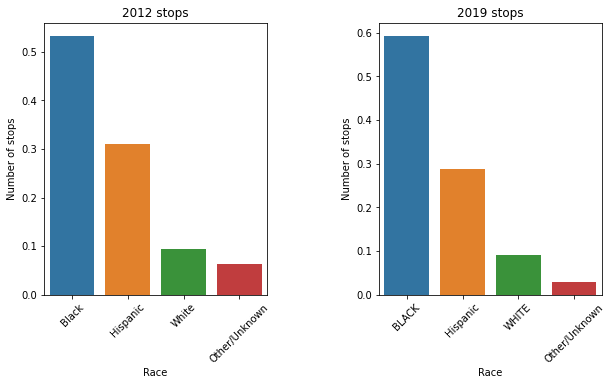

In [ ]:
#Selecting race proportions into a data frame for 2012 data
byrace2012 = sqf2012['race'].value_counts(normalize=True)
byrace2012 = byrace2012.to_frame()
byrace2012 = byrace2012.rename(columns={'race':'percentage'})
#Selecting race proportions into a data frame for 2019 data
byrace2019 = sqf2019['race'].value_counts(normalize=True)
byrace2019 = byrace2019.to_frame()
byrace2019 = byrace2019.rename(columns={'race':'percentage'})
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,5))
#Plotting 2012
g = sns.barplot(x=byrace2012.index, y= 'percentage', data=byrace2012, ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel = 'Race', ylabel = "Number of stops", title='2012 stops')
#Plotting 2019
g1 = sns.barplot(x=byrace2019.index, y= 'percentage', data=byrace2019, ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
g1.set(xlabel = 'Race', ylabel = "Number of stops", title='2019 stops')
plt.subplots_adjust(wspace=0.5)
plt.show()

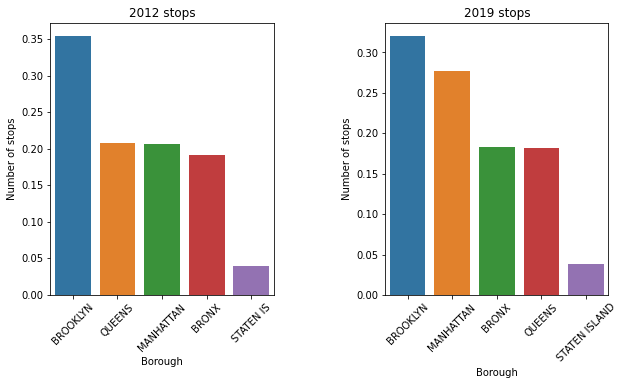

In [ ]:
#Selecting borough proportions into a data frame for 2012 data
bycity2012 = sqf2012['city'].value_counts(normalize=True)
bycity2012 = bycity2012.to_frame()
bycity2012 = bycity2012.rename(columns={'city':'percentage'})
#Selecting borough proportions into a data frame for 2019 data
bycity2019 = sqf2019['city'].value_counts(normalize=True)
bycity2019 = bycity2019.to_frame()
bycity2019 = bycity2019.rename(columns={'city':'percentage'})
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,5))
#Plotting 2012
g2 = sns.barplot(x=bycity2012.index, y= 'percentage', data=bycity2012, ax=ax[0])
g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
g2.set(xlabel = "Borough", ylabel = "Number of stops", title='2012 stops')
#Plotting 2019
g3 = sns.barplot(x=bycity2019.index, y= 'percentage', data=bycity2019, ax=ax[1])
g3.set_xticklabels(g3.get_xticklabels(), rotation=45)
g3.set(xlabel = "Borough", ylabel = "Number of stops", title='2019 stops')
plt.subplots_adjust(wspace=0.5)
plt.show()

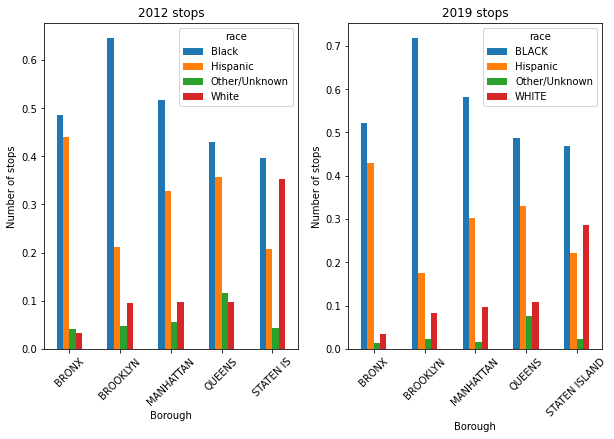

In [ ]:
#Creating figure and subplots to plot race by borough
fig, ax =plt.subplots(1,2, figsize=(10,6))
#Plotting 2012 data
g4 = sqf2012.groupby('city')['race'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[0])
g4.set_xticklabels(g4.get_xticklabels(), rotation=45)
g4.set(xlabel = "Borough", ylabel = "Number of stops", title='2012 stops')
#Plotting 2019 data
g5 = sqf2019.groupby('city')['race'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[1])
g5.set(xlabel = "Borough", ylabel = "Number of stops", title='2019 stops')
g5.set_xticklabels(g5.get_xticklabels(), rotation=45)
plt.show()

The race distribution had some changes from 2012 to 2019. Most notably, there was an increase of nearly 6% for black suspects. However, there was also a decrease in the 'Other/Unknow' category, which could signify a better data collection system leading to more accurate reporting. This could have contributed to the increase of stops for black suspects. 

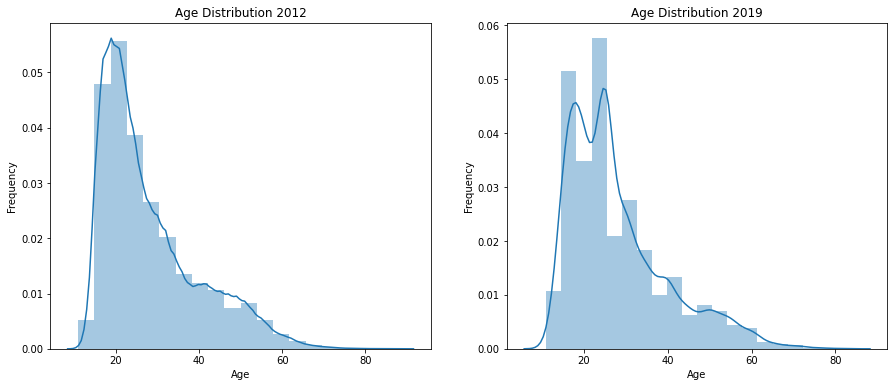

In [ ]:
#Creating figure and subplots 
fig, ax =plt.subplots(1,2, figsize=(15,6))
#Plotting 2012 data
g6 = sns.distplot(sqf2012['age'], hist=True, bins=20, ax=ax[0])
g6.set(xlabel = 'Age', ylabel='Frequency', title='Age Distribution 2012')
#Plotting 2019 data
g7 = sns.distplot(sqf2019['age'], hist=True, bins=20, ax=ax[1])
g7.set(xlabel = 'Age', ylabel='Frequency', title='Age Distribution 2019')
plt.show()

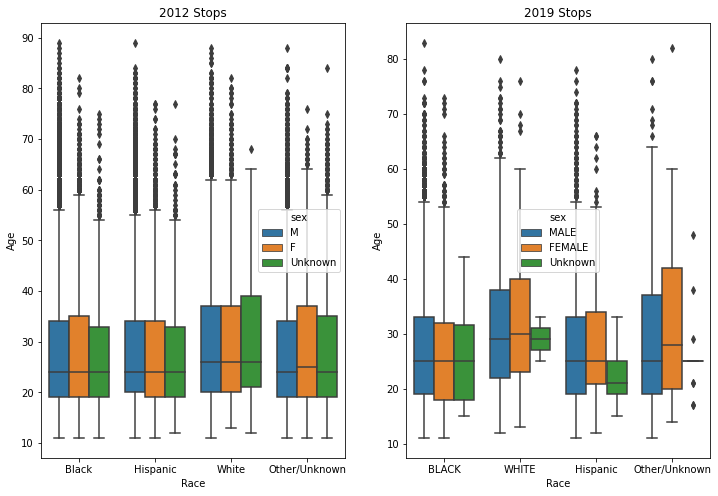

In [ ]:
#Creating figure and subplots 
fig, ax =plt.subplots(1,2, figsize=(12,8))
#Plotting 2012 data
g8 = sns.boxplot(x='race', y='age', hue='sex', data=sqf2012, ax=ax[0])
g8.set(xlabel = 'Race', ylabel='Age', title='2012 Stops')
#Plotting 2019 data
g9 = sns.boxplot(x='race', y='age', hue='sex', data=sqf2019, ax=ax[1])
g9.set(xlabel = 'Race', ylabel='Age', title='2019 Stops')
plt.show()

The age distribution remained largely the same. 75% of suspects were in their mid 30s or younger. The white suspects were older in both years, although not by much. There appears to be minimal variation in the age of the suspects when comparing sexes. 

# Escalation and Use of Force

In [ ]:
#Displaying proportion of suspects frisked for 2012
print(sqf2012['frisked'].value_counts(normalize=True))
#Printing empty space 
print('\n')
#Displaying proportion of suspects frisked for 2019
print(sqf2019['frisked'].value_counts(normalize=True))

Y    0.557774
N    0.442226
Name: frisked, dtype: float64


Y    0.566461
N    0.433539
Name: frisked, dtype: float64


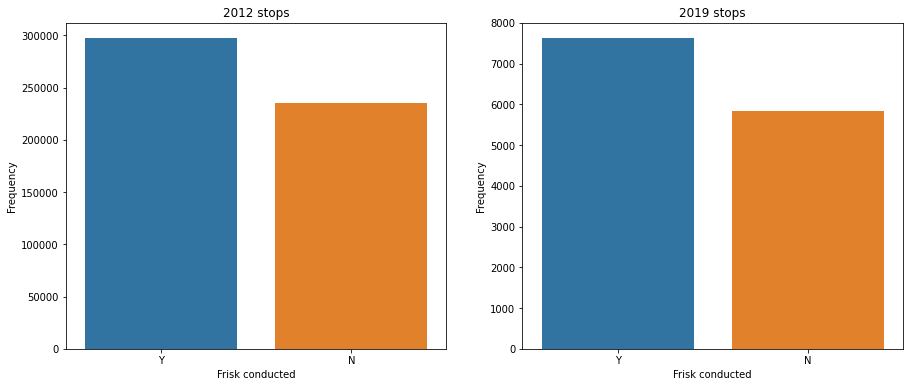

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(15,6))
#Plotting 2012 data
g10 = sns.countplot(x='frisked', data=sqf2012, ax=ax[0])
g10.set(xlabel = 'Frisk conducted', ylabel = "Frequency", title='2012 stops')
g11 = sns.countplot(x='frisked', data=sqf2019, ax=ax[1])
#Plotting 2019 data
g11.set(xlabel = 'Frisk conducted', ylabel = "Frequency", title='2019 stops')
plt.show()

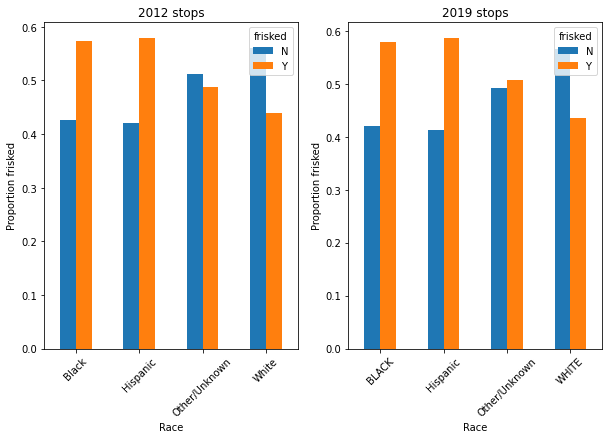

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,6))
#Plotting 2012 data
g11 = sqf2012.groupby('race')['frisked'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[0])
g11.set_xticklabels(g11.get_xticklabels(), rotation=45)
g11.set(xlabel = "Race", ylabel = "Proportion frisked", title='2012 stops')
#Plotting 2019 data
g12 = sqf2019.groupby('race')['frisked'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[1])
g12.set(xlabel = 'Race', ylabel = 'Proportion frisked', title='2019 stops')
g12.set_xticklabels(g12.get_xticklabels(), rotation=45)
plt.show()

The overall proportion of stops that led to the suspect being frisked had minimal variation between the 2 years. However, a pattern to note is that white suspects are less likely to be frisked during a stop. Black and Hispanic suspects have a nearly 60% of being frisked. White suspects have approximately a 42% of being frisked during a stop.

In [ ]:
#Displaying proportion of suspects searched for 2012
print(sqf2012['searched'].value_counts(normalize=True))
#Printing whitespace
print('\n')
#Displaying proportion of suspects searched for 2012
print(sqf2019['searched'].value_counts(normalize=True))

N    0.916969
Y    0.083031
Name: searched, dtype: float64


N    0.629393
Y    0.370607
Name: searched, dtype: float64


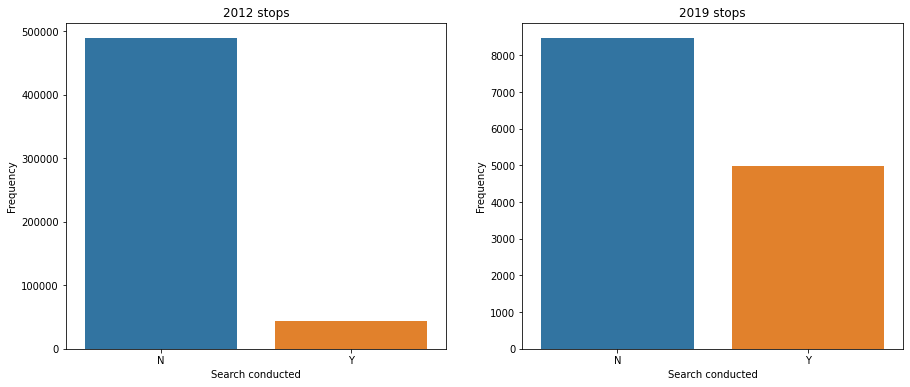

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(15,6))
#Plotting 2012 data
g13 = sns.countplot(x='searched', data=sqf2012, ax=ax[0])
g13.set(xlabel = 'Search conducted', ylabel = "Frequency", title='2012 stops')
#Plotting 2019 data
g14 = sns.countplot(x='searched', data=sqf2019, ax=ax[1])
g14.set(xlabel = 'Search conducted', ylabel = "Frequency", title='2019 stops')
plt.show()

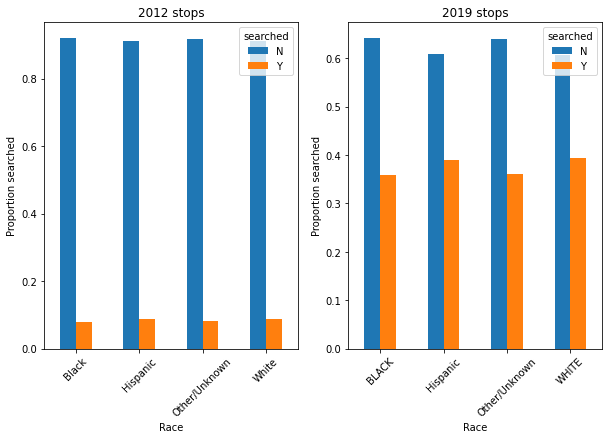

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,6))
#Plotting 2012 data
g15 = sqf2012.groupby('race')['searched'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[0])
g15.set_xticklabels(g15.get_xticklabels(), rotation=45)
g15.set(xlabel = "Race", ylabel = "Proportion searched", title='2012 stops')
#Plotting 2019 data
g16 = sqf2019.groupby('race')['searched'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[1])
g16.set(xlabel = 'Race', ylabel = 'Proportion searched', title='2019 stops')
g16.set_xticklabels(g16.get_xticklabels(), rotation=45)
plt.show()

From 2012 to 2019 there was a tremendous increase in the percentage of stops that led to a search, which is a step above being frisked. However there appears to be an even distribution between the races. One race is not more likely to get searched than another.

In [ ]:
#Displaying proportion of suspects for which physical force was used in 2012
print(sqf2012['pfused'].value_counts(normalize=True))
#Printing white space
print('\n')
#Displaying proportion of suspects for which physical force was used in 2019
print(sqf2019['pfused'].value_counts(normalize=True))

N    0.832891
Y    0.167109
Name: pfused, dtype: float64


N    0.765287
Y    0.234713
Name: pfused, dtype: float64


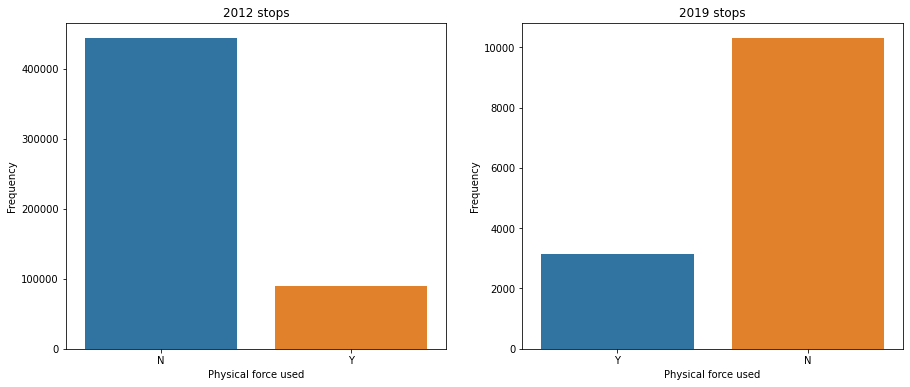

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(15,6))
#Plotting 2012 data
g17 = sns.countplot(x='pfused', data=sqf2012, ax=ax[0])
g17.set(xlabel = 'Physical force used', ylabel = "Frequency", title='2012 stops')
#Plotting 2019 data
g18 = sns.countplot(x='pfused', data=sqf2019, ax=ax[1])
g18.set(xlabel = 'Physical force used', ylabel = "Frequency", title='2019 stops')
plt.show()

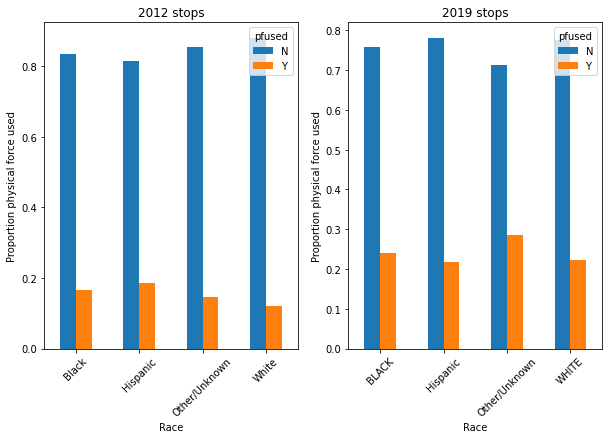

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,6))
#Plotting 2012 data
g19 = sqf2012.groupby('race')['pfused'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[0])
g19.set_xticklabels(g19.get_xticklabels(), rotation=45)
g19.set(xlabel = "Race", ylabel = "Proportion physical force used", title='2012 stops')
#Plotting 2019 data
g20 = sqf2019.groupby('race')['pfused'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[1])
g20.set(xlabel = 'Race', ylabel = 'Proportion physical force used', title='2019 stops')
g20.set_xticklabels(g20.get_xticklabels(), rotation=45)
plt.show()

From 2012 to 2019, there was a 7% increase in the proportion of stops that lead to the use of physical force. There is no evidence that a particular race was more likely to be the subject of physical force. 

# Program Effectiveness

In [ ]:
#Displaying proportion of stops that lead to contraband being found in 2012
print(sqf2012['contrabn'].value_counts(normalize=True))
#Printing white space
print('\n')
#Displaying proportion of stops that lead to contraband being found in 2012
print(sqf2019['contraband'].value_counts(normalize=True))

N    0.982673
Y    0.017327
Name: contrabn, dtype: float64


N    0.918419
Y    0.081581
Name: contraband, dtype: float64


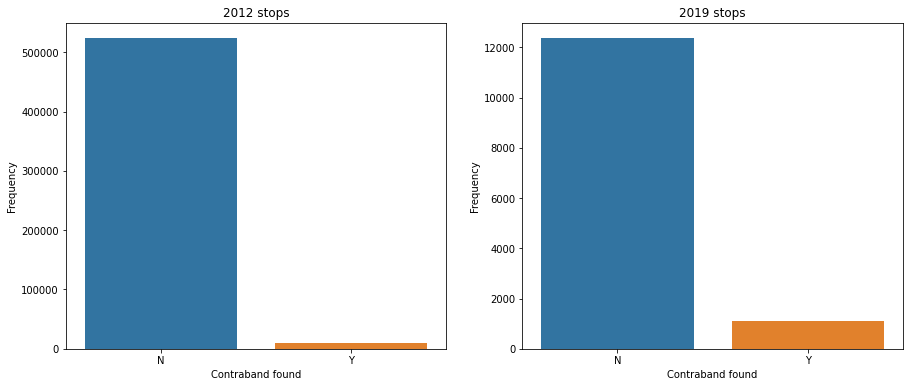

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(15,6))
#Plotting 2012 data
g21 = sns.countplot(x='contrabn', data=sqf2012, ax=ax[0])
g21.set(xlabel = "Contraband found", ylabel = "Frequency", title='2012 stops')
#Plotting 2019 data
g22 = sns.countplot(x='contraband', data=sqf2019, ax=ax[1])
g22.set(xlabel = "Contraband found", ylabel = "Frequency", title='2019 stops')
plt.show()

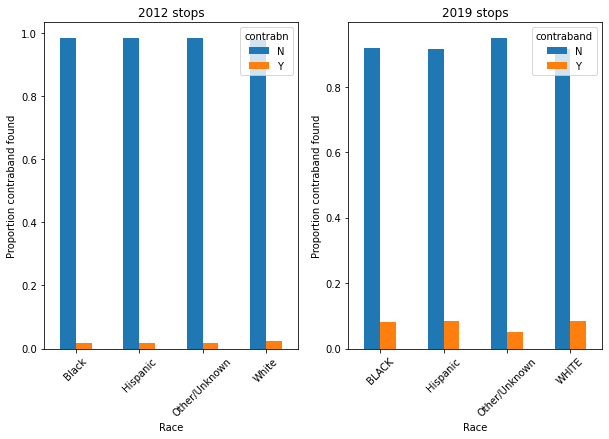

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,6))
#Plotting 2012 data
g23 = sqf2012.groupby('race')['contrabn'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[0])
g23.set_xticklabels(g23.get_xticklabels(), rotation=45)
g23.set(xlabel = "Race", ylabel = "Proportion contraband found", title='2012 stops')
#Plotting 2019 data
g24 = sqf2019.groupby('race')['contraband'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[1])
g24.set(xlabel = 'Race', ylabel = 'Proportion contraband found', title='2019 stops')
g24.set_xticklabels(g24.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
#Displaying proportion of contraband found by race in 2012
print(sqf2012.groupby('race')['contrabn'].value_counts(normalize=True))
#Printing white space
print('\n')
#Displaying proportion of contraband found by race in 2012
print(sqf2019.groupby('race')['contraband'].value_counts(normalize=True))

race           contrabn
Black          N           0.983679
               Y           0.016321
Hispanic       N           0.982578
               Y           0.017422
Other/Unknown  N           0.983542
               Y           0.016458
White          N           0.976730
               Y           0.023270
Name: contrabn, dtype: float64


race           contraband
BLACK          N             0.919058
               Y             0.080942
Hispanic       N             0.914448
               Y             0.085552
Other/Unknown  N             0.949239
               Y             0.050761
WHITE          N             0.916872
               Y             0.083128
Name: contraband, dtype: float64


The rate of stops for which contraband was found increased by approximately 6%. This increase appears to be consistent accross all races, with no evidence of racial disproportion.

In [ ]:
#Displaying proportion of firearms found in 2012
print(sqf2012['fireweap'].value_counts(normalize=True))
#Printing white space
print('\n')
#Displaying proportion of firearms found in 2019
print(sqf2019['firearm'].value_counts(normalize=True))

N    0.998658
Y    0.001342
Name: fireweap, dtype: float64


N    0.969166
Y    0.030834
Name: firearm, dtype: float64


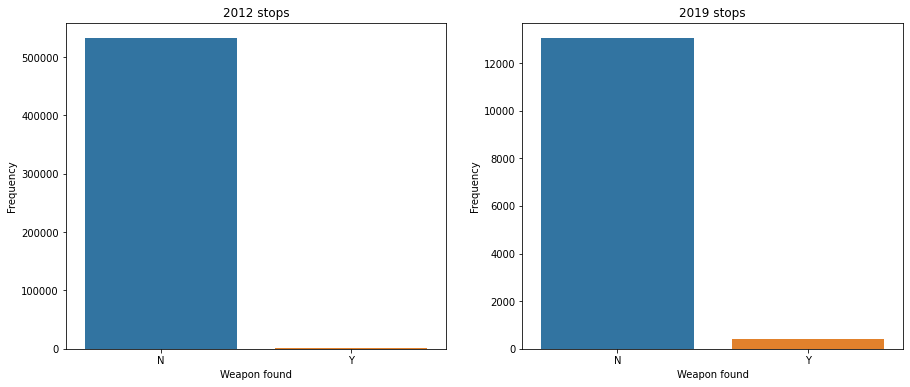

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(15,6))
#Plotting 2012 data
g25 = sns.countplot(x='fireweap', data=sqf2012, ax=ax[0])
g25.set(xlabel = "Weapon found", ylabel = "Frequency", title='2012 stops')
#Plotting 2019 data
g26 = sns.countplot(x='firearm', data=sqf2019, ax=ax[1])
g26.set(xlabel = 'Weapon found', ylabel = "Frequency", title='2019 stops')
plt.show()

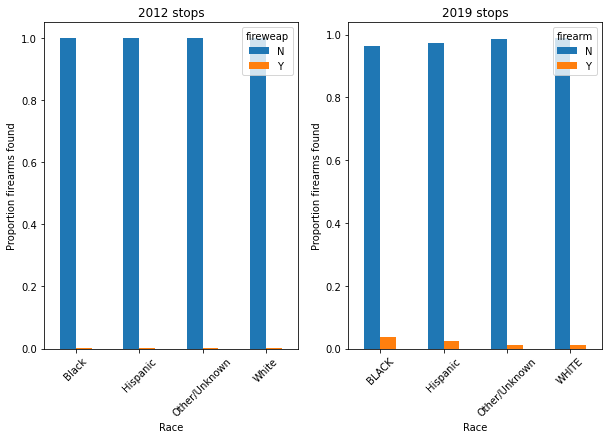

In [ ]:
#Creating figure and subplots
fig, ax =plt.subplots(1,2, figsize=(10,6))
#Plotting 2012 data
g27 = sqf2012.groupby('race')['fireweap'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[0])
g27.set_xticklabels(g23.get_xticklabels(), rotation=45)
g27.set(xlabel = "Race", ylabel = "Proportion firearms found", title='2012 stops')
#Plotting 2019 data
g28 = sqf2019.groupby('race')['firearm'].value_counts(normalize=True).unstack(fill_value=0).plot.bar(ax=ax[1])
g28.set(xlabel = 'Race', ylabel = 'Proportion firearms found', title='2019 stops')
g28.set_xticklabels(g24.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
#Displaying proportion of firearms found by race in 2012
print(sqf2012.groupby('race')['fireweap'].value_counts(normalize=True))
#Printing white space
print('\n')
#Displaying proportion of firearms found by race in 2019
print(sqf2019.groupby('race')['firearm'].value_counts(normalize=True))

race           fireweap
Black          N           0.998276
               Y           0.001724
Hispanic       N           0.998995
               Y           0.001005
Other/Unknown  N           0.999216
               Y           0.000784
White          N           0.999345
               Y           0.000655
Name: fireweap, dtype: float64


race           firearm
BLACK          N          0.962661
               Y          0.037339
Hispanic       N          0.974412
               Y          0.025588
Other/Unknown  N          0.987310
               Y          0.012690
WHITE          N          0.989300
               Y          0.010700
Name: firearm, dtype: float64


The proportion of stops leading to a firearm being found increased from a tenth of a percent in 2012 to 3% in 2019. The increase was consitent across all races. However, black and hispanic subjects are more likely to be found with a firearm. 

[Text(0.5, 1.0, 'Crimes vs Search and Frisk Stops in NYC')]

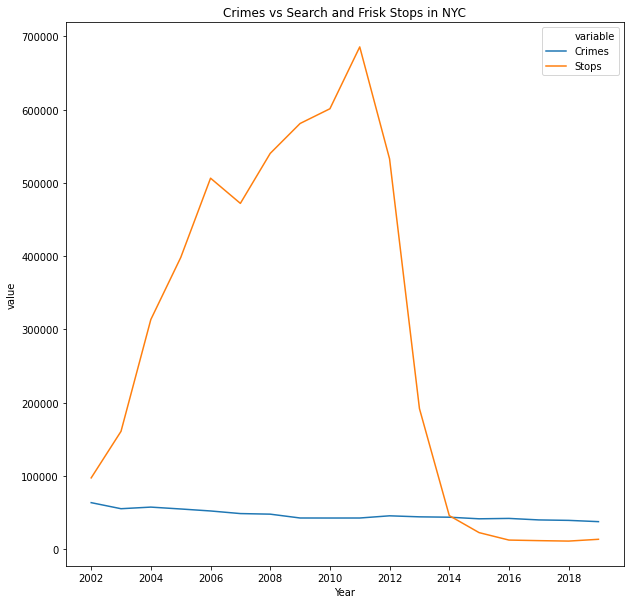

In [ ]:
#Melting data frame
melt_crime_stops = pd.melt(crime_stops, id_vars=['Year'], value_vars=['Crimes', 'Stops'])
#Creating figure
plt.figure(figsize=(10,10))
#Plotting data
g29 = sns.lineplot(x='Year', y='value', hue='variable', data=melt_crime_stops)
g29.set(title='Crimes vs Search and Frisk Stops in NYC')

# Conclusion

The policies implemented by the NYPD have decreased the overall number of stops exponentially. This has led to an increase in contraband and weapons found. However, the proportion of sucessful stops is still very low. Overpolicing still creates racial disproportions in these stops. The majority of the stops are towards black and hispanic suspects, which is inconsistent with the population demographics. This is exemplified by the lower propability of white suspects being frisked, despite white suspects being just as likely to be found with contraband. Additionally, increasing the number of stops does not decrease the crime rate. It is my personal belief that increasing the number of stops leads to an advesarial relationship between the police force and the population, which is detrimental to their mission.